# 🏡 AirBnB Listing Analysis in Paris
## Introduction

The Airbnb market in Paris has undergone significant changes due to recent regulations. This project aims to explore trends in Airbnb listings, including pricing, host behaviors, and accommodation characteristics, to understand the impact of these regulations on the market.

I will be using a large dataset of Airbnb listings to uncover insights such as:

- Which neighborhoods in Paris have the highest average listing prices?
- How have listing prices changed over time?
- How has the number of Airbnb hosts in Paris changed over the years?

This analysis will help us answer key questions that may interest Airbnb hosts, guests, and even policymakers regulating the short-term rental market.

The dataset used in this project contains detailed information about Airbnb listings in various cities. For the purpose of this project, I have filtered the dataset to focus only on **Paris listings**.

Let's dive into the data to uncover valuable insights from the Airbnb market in Paris!


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
# 🧩 Import Necessary Libraries
# - pandas for data manipulation
# - numpy for numerical operations
# - matplotlib for data visualization

In [3]:
listings = pd.read_csv('Data/Listings.csv', low_memory = False, encoding = "ISO-8859-1", parse_dates = ['host_since'])

In [ ]:
# 🚀 Load the Data
# The dataset contains listings across multiple cities. We filter it to include only Paris listings.
# The 'host_since' column is parsed as a datetime to help with time-based analysis.

In [4]:
listings_paris = listings.query("city == 'Paris'").loc[:, ['host_since','neighbourhood','city','accommodates','price'] ]

In [ ]:
# 🎯 Filter the Data for Paris Listings
# .query() method to filter out listings from other cities, keeping only Paris-related data.
# The columns selected for further analysis are:
# - 'host_since': Date when the host joined
# - 'neighbourhood': Location of the listing
# - 'city': City of the listing
# - 'accommodates': Number of people the listing can accommodate
# - 'price': Listing price

In [5]:
listings_paris.info() #  33 NaN values in host_since, small fraction of data so will leave it as is

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
# 🔍 Data Overview
# .info() to get a quick summary of the dataset, including the number of non-null values, data types, and memory usage.

In [6]:
listings_paris.describe().loc[:,['accommodates', 'price']] # the max, min, average values for price and accommodates

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000
std,1.588766,214.433668


In [ ]:
# 🧪 Quick Summary Statistics
# Use .describe() to get a quick overview of the numerical data.
# This helps identify the range of values for columns like 'price' and 'accommodates'.
# Key insights include:
# - Minimum, maximum, mean, and standard deviation values
# - Helps spot any unusual or incorrect values

In [7]:
listings_paris.query("accommodates == 0 and price == 0").count() # small fraction of data, will leave it as is

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [8]:
listings_paris

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [ ]:
# 🧹 Data Cleaning
# We filter out any listings with negative or missing values in the 'accommodates' and 'price' columns.
# This ensures we only analyze valid listings.

In [9]:
paris_listings_neighbourhood = (
                                listings_paris
                                .groupby('neighbourhood')
                                .agg({'price':'mean'})
                                .sort_values(by = 'price', ascending = True )
                               )

In [10]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [ ]:
# 📊 Group Listings by Neighborhood
# Group the data by the 'neighbourhood' column and calculate the average price for each neighborhood.
# This helps identify which neighborhoods are the most expensive for Airbnb listings in Paris.

In [11]:
paris_listings_accomodations = (listings_paris
                                .query('neighbourhood == "Elysee"')
                                .groupby('accommodates')
                                .agg({'price':'mean'})
                                .sort_values(by = 'price', ascending = True )
                               )

In [12]:
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [ ]:
# 📈 Analyze Accommodations in the Most Expensive Neighborhood
# Focus on the 'Elysee' neighborhood and analyze the average prices based on the number of people accommodated.
# This provides insights into how prices vary with the size of the listing.

In [13]:
paris_listings_over_time = (
                            listings_paris
                            .set_index('host_since')
                            .resample('YE')
                            .agg({
                                'neighbourhood':'count',
                                'price':'mean'
                                 }
                                )
                           )

In [14]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


# 🧐 Key Questions to Guide Our Analysis

In this project, we aim to address several key questions to better understand the Airbnb market in Paris. These questions will guide our exploration and visualization of the data.

### Key Questions:

1️⃣ **Which neighborhoods in Paris have the most expensive Airbnb listings?**  
   We will identify the neighborhoods with the highest average prices and examine the factors driving these prices.

2️⃣ **How have Airbnb prices in Paris changed over time?**  
   We will explore how prices have fluctuated across different neighborhoods and time periods.

3️⃣ **How has the number of Airbnb hosts in Paris evolved over time?**  
   We will analyze the growth of Airbnb hosts in Paris to see if there were any significant spikes or declines.

4️⃣ **What types of accommodations are most common in the most expensive neighborhoods?**  
   We will break down the types of listings (e.g., private rooms, entire homes) and their impact on average prices.

These questions will help structure our analysis and provide valuable insights into the Paris Airbnb market.


<Axes: title={'center': 'Average Price by Neighbourhood in Paris'}, ylabel='neighbourhood'>

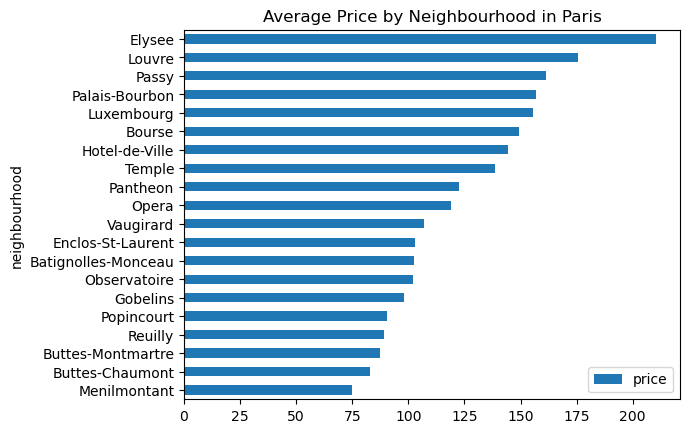

In [15]:
paris_listings_neighbourhood.plot.barh(title = 'Average Price by Neighbourhood in Paris')

In [ ]:
# 📊 Bar Chart of Average Prices by Neighborhood
# This bar chart shows the average price of Airbnb listings in each neighborhood in Paris.
# It highlights the differences in pricing between neighborhoods.

<Axes: title={'center': 'Average Price by Number of People Accomodated in Most Expensive Neighbourhood in Paris'}, ylabel='accommodates'>

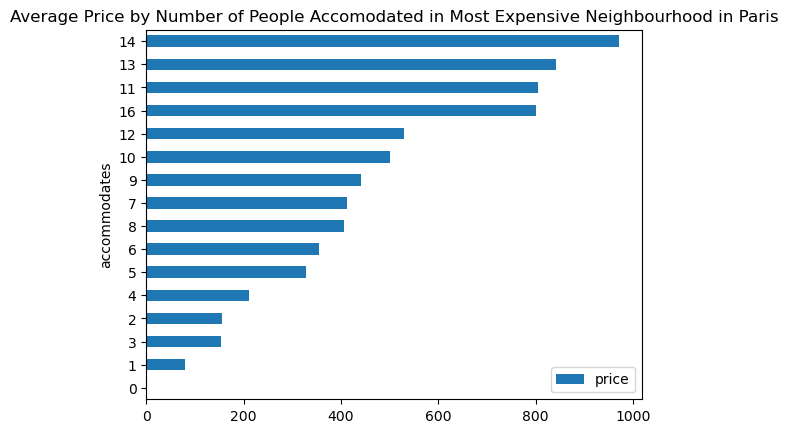

In [16]:
paris_listings_accomodations.plot.barh(title = 'Average Price by Number of People Accomodated in Most Expensive Neighbourhood in Paris')

<Axes: xlabel='host_since'>

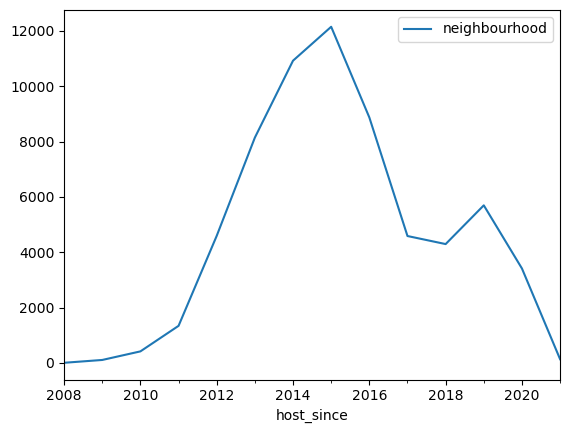

In [17]:
hosts_over_time = paris_listings_over_time.reset_index().plot.line(x = 'host_since', y = 'neighbourhood')
hosts_over_time

In [ ]:
# 📉 Line Plot of Hosts Over Time
# This line plot shows the number of Airbnb hosts joining the platform over time.
# It highlights trends in the growth of Airbnb listings in Paris.

<Axes: xlabel='host_since'>

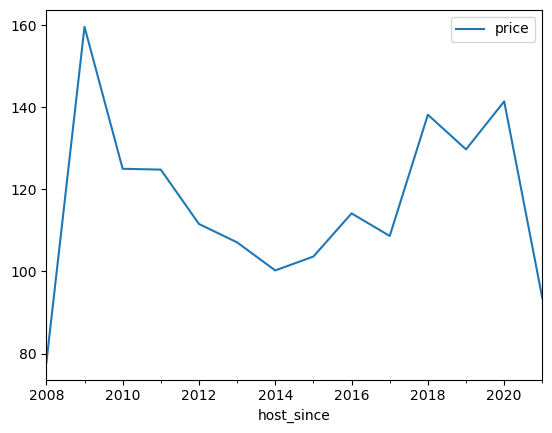

In [18]:
price_over_time = paris_listings_over_time.reset_index().plot.line(x = 'host_since', y = 'price')
price_over_time

In [ ]:
# 📈 Line Plot of Prices Over Time
# This line plot shows how the average price of Airbnb listings has changed over time.
# It provides insights into how prices have fluctuated and whether they are increasing or decreasing over the years.

# 📢 Summary of Key Findings

After analyzing the Airbnb listings in Paris, here are some key insights from the data:

### ✅ **1. Neighborhood Insights**  
- The most expensive neighborhoods in Paris include **Elysee**, **Louvre**, and **Palais-Bourbon**.  
- These neighborhoods have higher average listing prices compared to other parts of Paris.

### ✅ **2. Trends Over Time**  
- The number of Airbnb hosts in Paris saw significant growth between **2010 and 2016**, but there has been a slight decline since **2018**.  
- Average listing prices in Paris have fluctuated over time, with some neighborhoods experiencing sharper increases than others.

### ✅ **3. Accommodation Insights**  
- Larger accommodations (those that can accommodate more guests) tend to have higher average prices.  
- The type of listing (e.g., private room vs. entire home) also impacts the average price, with entire homes being more expensive.

---

This analysis provides valuable insights into the Airbnb market in Paris and can be useful for hosts, guests, and policymakers alike.
